In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from functools import partial

import matplotlib.pyplot as plt
import numpy as np

from cmprs import rounding, eden
from cmprs.metrics.mse import estimate_vNMSE_over_dist

In [4]:
from cmprs.metrics.vec_generators import normal_generator

N_VECS = 10
REPEATS_PER_VEC = 10

sample_vec_fn = normal_generator(2 ** 12)

In [5]:
sr = partial(rounding, 'randomized')
sd = partial(rounding, 'subtractive')

In [6]:
bits = np.arange(0.1, 4.1, 0.1)

In [7]:
def plot_line(cmprs, label):
    res = [estimate_vNMSE_over_dist(n_vecs=N_VECS, repeats_per_vec=REPEATS_PER_VEC,
                                    sample_vec_fn=sample_vec_fn,
                                    compression_scheme=cmprs(bits=b)).item() for b in bits]
    plt.plot(bits, res, label=label)

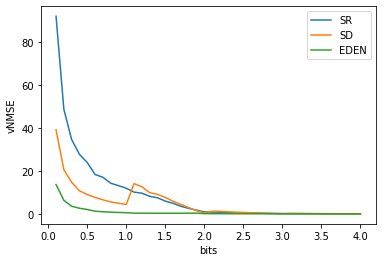

In [28]:
plt.ylabel('vNMSE')
plt.xlabel('bits')

plot_line(sr, 'SR')
plot_line(sd, 'SD')
plot_line(eden, 'EDEN')

plt.legend()